In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
X_train = np.loadtxt("/content/X_train.csv")
y_train = np.loadtxt("/content/Y_train.csv")
X_test=np.loadtxt("/content/X_test.csv")
y_test=np.loadtxt("/content/Y_test.csv")

In [122]:
import time
import numpy
import pandas as pd

class self_Neural_Network:
  def __init__(self):
    # Define the number of neurons
    #Weights
    self.w1=np.random.randn(3, 2)
    self.w2=np.random.randn(1, 3)
    #Biases
    #self.b_h= np.random.rand(X.T.shape[1])
    #self.b_y_pred= np.random.rand(X.T.shape[1])

  def sigmoid(self, X): return 1/(1 + np.e**-X)

  def feedforward(self,X):
    #print(X.T.shape)
    self.l1 = (np.dot(self.w1 ,X.T)) 
    #print(self.l1)
    self.l1_output = np.array(self.sigmoid(self.l1))  
    self.output = np.dot(self.w2, self.l1_output)
    self.y_pred_1 = self.sigmoid(self.output)
    return(self.y_pred_1)

  def backpropagation(self, X, y):
    # Layer Error
    self.po= (self.y_pred_1 - self.y)
    self.dWo = np.dot(self.po, self.l1_output.transpose())

    self.th =  np.dot(self.w2.T , self.po)*self.l1_output*(1-self.l1_output)
    self.dWh = np.dot(self.th , X)

    # Update weights
    self.w1 -= self.lr * self.dWh
    self.w2 -= self.lr * self.dWo

    # Update the biases

  def fit(self, X, y, epoch, lr, alpha):
    self.X=X
    self.y=y
    self.epoch=epoch
    self.lr = lr
    self.alpha=alpha
    self.mse_list = []
    self.acc_list=[]
    for i in range(epoch):
      mse = np.square(np.subtract(y,self.predict(X))).mean()
      self.mse_list.append(mse)

      acc=(np.array(y) == np.array(self.predict(X))).sum() / y.shape[0]
      self.acc_list.append(acc)

      self.feedforward(X)
      self.backpropagation(X,y) 
    return self.mse_list, self.acc_list

  def predict(self, X):
      y_pred_1 = self.feedforward(X)
      return y_pred_1.T

  def plot(self):
    #Plot MSE VS Epoch
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = (10, 3)
    plt.style.use('seaborn-whitegrid')
    plt.plot(self.mse_list,label='MSE')
    plt.title('Neural Network Training Process', fontSize=15)
    plt.xlabel('Epoch', fontSize=12)
    plt.ylabel('MSE', fontSize=12)
    plt.show()
    # PLot Accuracy Vs Epoch
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = (10, 3)
    plt.style.use('seaborn-whitegrid')
    plt.plot(self.acc_list,label='accuracy')
    plt.title('Neural Network Training Process', fontSize=15)
    plt.xlabel('Epoch', fontSize=12)
    plt.ylabel('Accuracy', fontSize=12)
    plt.show()

 3. Report the average MSE loss and the accuracy.

In [129]:
model = self_Neural_Network()
network=model.fit(X_train, y_train, epoch=200, lr=0.001, alpha=0.7)
y_pred = model.predict(X_test)
mse=np.square(np.subtract(y_test, y_pred)).mean()
mse

5626.1078315834675

In [130]:
acc=(np.array(y_test) == np.array(y_pred)).sum() / y_test.shape[0]
acc

0.0

4. Plot the loss and accuracy as a function of the number of iterations.

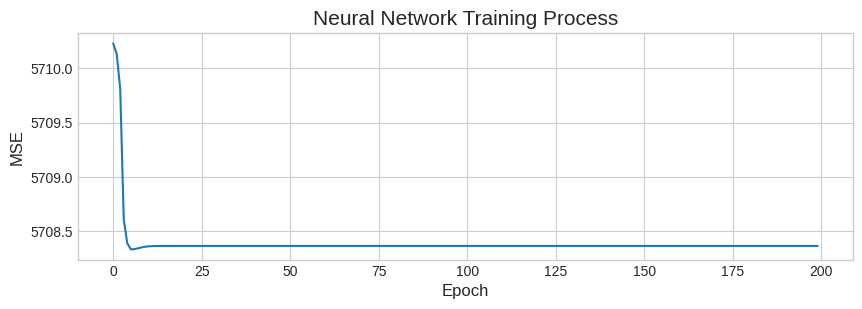

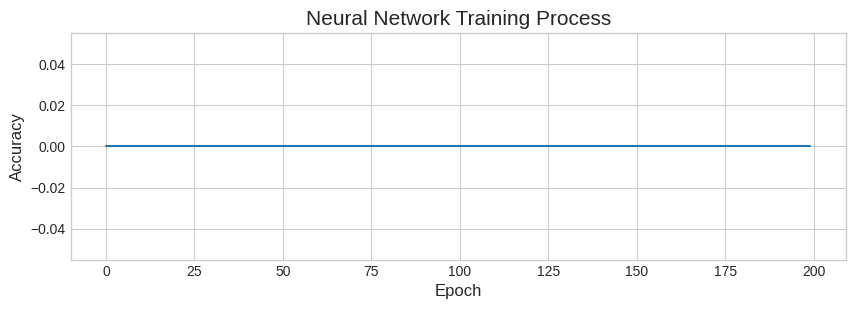

In [131]:
model.plot()

5. What is the effect of the learning rate on the training process? Vary the learning rate to be 
between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.

In [132]:
acc2=[]
def decimal_range(start, stop, increment):
    while start < stop:
        yield start
        start += increment
for i in np.arange(0, 1, 0.01):
  model = self_Neural_Network()
  network=model.fit(X_train, y_train, epoch=100, lr=i, alpha=0.7)
  y_pred = model.predict(X_test)
  acc=(np.array(y_test) == np.array(y_pred)).sum() / y_test.shape[0]
  acc2.append(acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app


In [133]:
learning_rate=[]
def decimal_range(start, stop, increment):
    while start < stop:
        yield start
        start += increment
for i in np.arange(0, 1, 0.01):
  learning_rate.append(i)
x=list(learning_rate)
y=list(acc2)
Coeff_weight=pd.DataFrame(
    {'learning_rate': x,
     'acc': y
    })

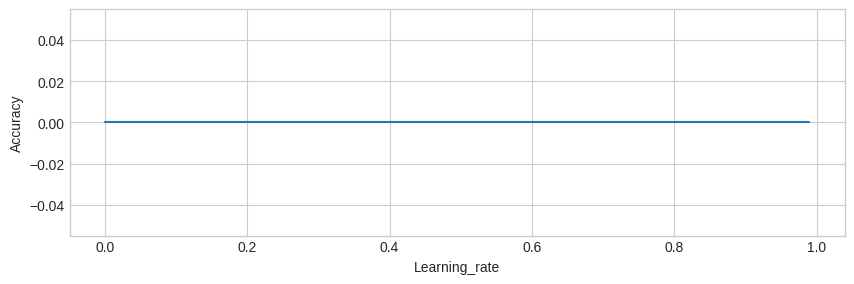

In [134]:
plt.plot(learning_rate,acc2)
plt.xlabel('Learning_rate')
plt.ylabel('Accuracy')
plt.show()

6. What is the effect of the number of neurons in the hidden layer? To answer this question, 
you will need to consider and answer the following:
a. You will need to vary the number of neurons from 1 to 10. Does the update rule 
need to be changed/derived again? Why or why not?
b. Report your observations by reporting the final loss and plotting the true labels and 
your predicted labels, along with a brief (2-3 lines) description.

In [135]:
import time
import numpy
import pandas as pd

class self_Neural_Network:
  def __init__(self,n):
    # Define the number of neurons
    #Weights
    self.w1=np.random.randn(n, 2)
    self.w2=np.random.randn(1, n)
    #Biases
    #self.b_h= np.random.rand(X.T.shape[1])
    #self.b_y_pred= np.random.rand(X.T.shape[1])

  def sigmoid(self, X): return 1/(1 + np.e**-X)

  def feedforward(self,X):
    #print(X.T.shape)
    self.l1 = (np.dot(self.w1 ,X.T)) 
    #print(self.l1)
    self.l1_output = np.array(self.sigmoid(self.l1))  
    self.output = np.dot(self.w2, self.l1_output)
    self.y_pred_1 = self.sigmoid(self.output)
    return(self.y_pred_1)

  def backpropagation(self, X, y):
    # Layer Error
    self.po= (self.y_pred_1 - self.y)
    self.dWo = np.dot(self.po, self.l1_output.transpose())

    self.th =  np.dot(self.w2.T , self.po)*self.l1_output*(1-self.l1_output)
    self.dWh = np.dot(self.th , X)

    # Update weights
    self.w1 -= self.lr * self.dWh
    self.w2 -= self.lr * self.dWo

    # Update the biases

  def fit(self, X, y, epoch, lr, alpha):
    self.X=X
    self.y=y
    self.epoch=epoch
    self.lr = lr
    self.alpha=alpha
    self.mse_list = []
    self.acc_list=[]
    for i in range(epoch):
      mse = np.square(np.subtract(y,self.predict(X))).mean()
      self.mse_list.append(mse)

      acc=(np.array(y) == np.array(self.predict(X))).sum() / y.shape[0]
      self.acc_list.append(acc)

      self.feedforward(X)
      self.backpropagation(X,y) 
    return self.mse_list, self.acc_list

  def predict(self, X):
      y_pred_1 = self.feedforward(X)
      return y_pred_1.T

In [136]:
mse1=[]
true_value=[]
predicted_value=[]
for i in range(1,11):
  model = self_Neural_Network(n=i)
  network=model.fit(X_train, y_train, epoch=200, lr=0.001, alpha=0.7)
  y_pred = model.predict(X_test)
  mse=np.square(np.subtract(y_test, y_pred)).mean()
  mse1.append(mse)
  true_value.append(y_test)
  predicted_value.append(y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app


In [137]:
a=[1,2,3,4,5,6,7,8,9,10]
x=list(a)
y=list(mse1)
Coeff_weight=pd.DataFrame(
    {'Number of hidden Neurons': x,
     'MSE Value': y
    })
Coeff_weight

,Number of hidden Neurons,MSE Value
0,1,5633.945048
1,2,5621.710981
2,3,5626.561557
3,4,5626.561557
4,5,5626.561557
5,6,5626.561557
6,7,5621.707332
7,8,5626.561557
8,9,5626.561557
9,10,5626.561557


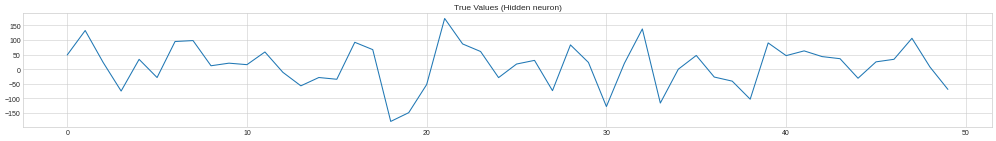

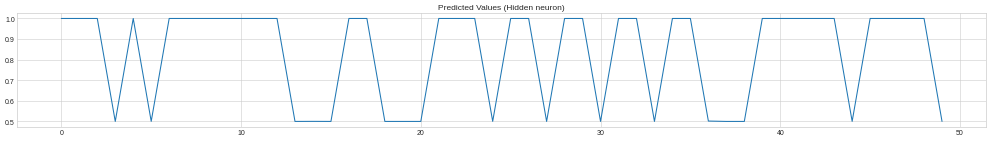

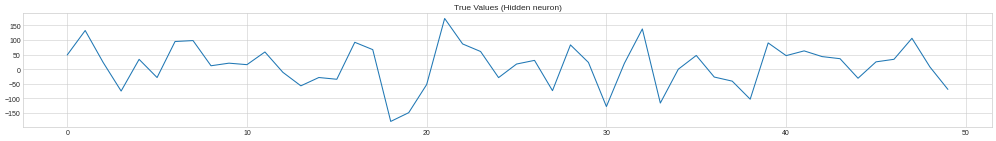

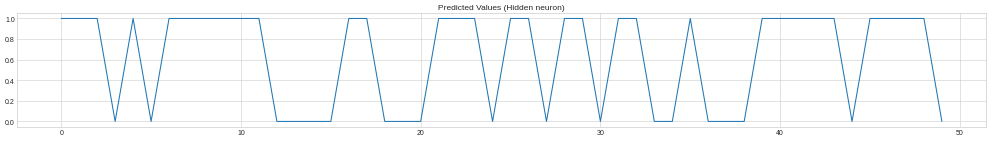

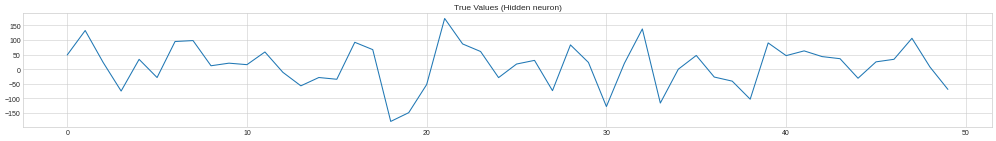

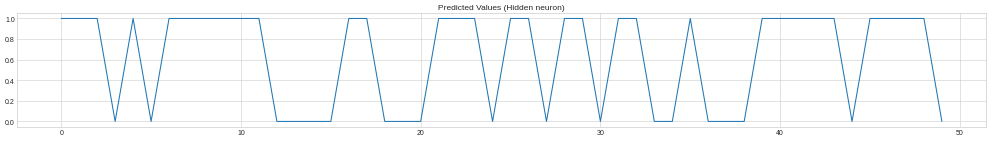

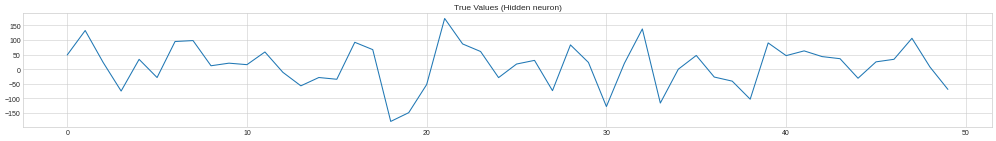

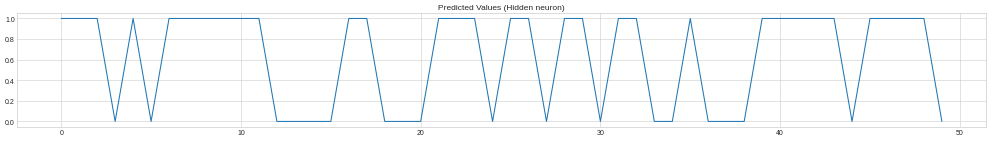

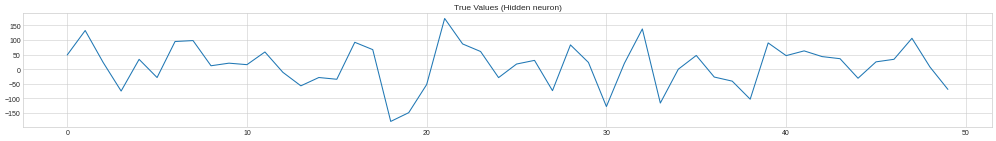

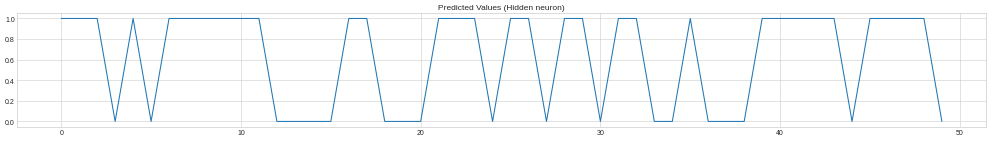

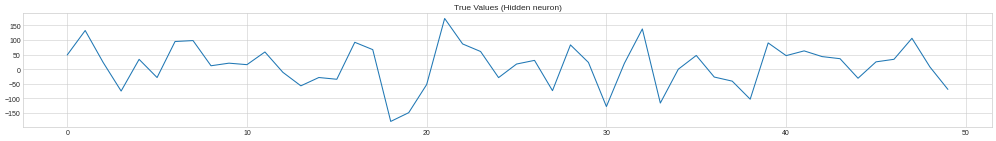

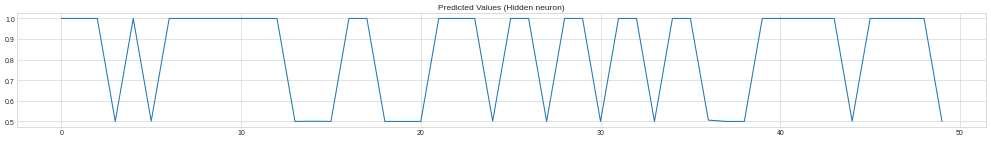

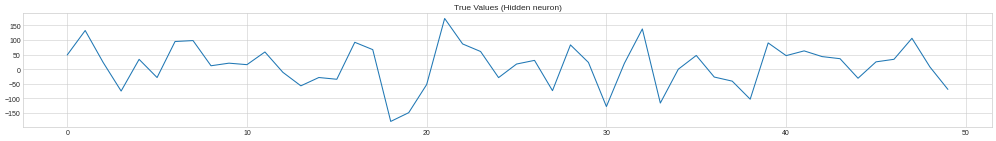

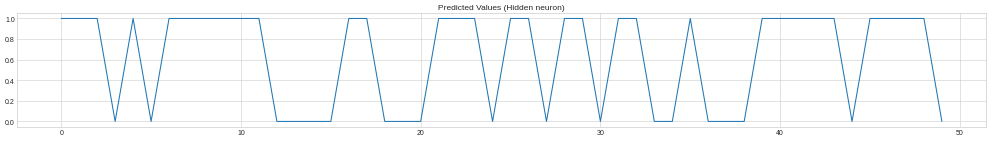

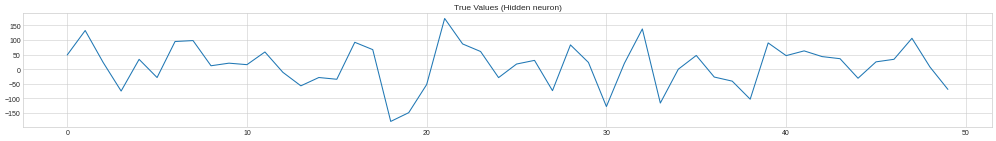

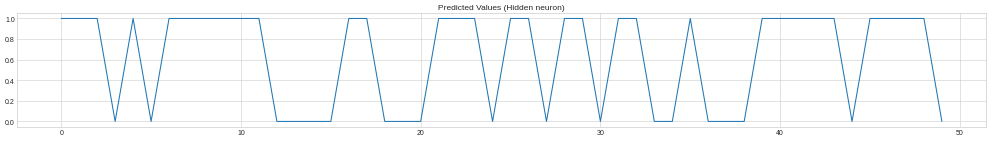

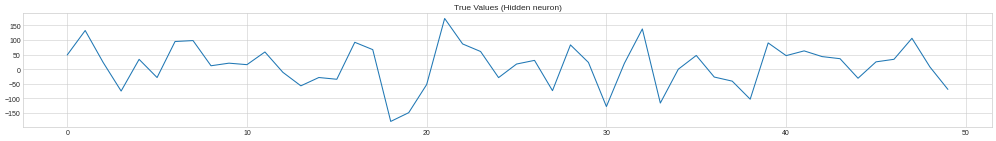

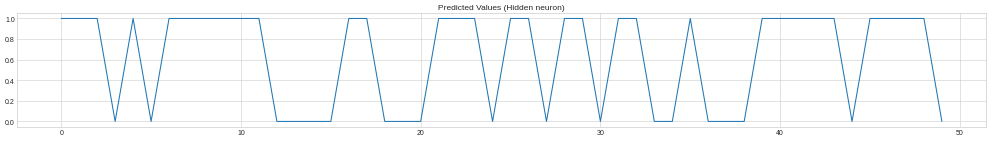

IndexError: ignored

In [138]:
for k in range(1,11):
  plt.rcParams['figure.dpi'] = 50
  plt.rcParams['figure.figsize'] = (25, 3)
  plt.style.use('seaborn-whitegrid')
  plt.plot(true_value[k],label='True Values')
  plt.title('True Values (Hidden neuron)')
  plt.show()
  plt.plot(predicted_value[k],label='Predicted values')
  plt.title('Predicted Values (Hidden neuron)')
  plt.show()

7. What is the effect of the activation functions in the network? Explore two different activation 
functions other than sigmoid such as tanh, linear, or ReLU.
a. Will you need to change the update rule?
b. What is the change that you need to make to achieve this experiment?
c. Report your observations by reporting the final loss and plotting the true labels and 
your predicted labels, along with a brief (2-3 lines) description.

ReLU

In [139]:
import time
import numpy
import pandas as pd

class Neural_Network:
  def __init__(self):
    # Define the number of neurons
    #Weights
    self.w1=np.random.randn(3, 2)
    self.w2=np.random.randn(1, 3)
    #Biases
    #self.b_h= np.random.rand(X.T.shape[1])
    #self.b_y_pred= np.random.rand(X.T.shape[1])

  def ReLU(self, X): return np.maximum(0,X)

  def feedforward(self,X):
    #print(X.T.shape)
    self.l1 = (np.dot(self.w1 ,X.T)) 
    #print(self.l1)
    self.l1_output = np.array(self.ReLU(self.l1))  
    #print(self.l1_output)
    self.output = np.dot(self.w2, self.l1_output)
    self.y_pred_1 = self.ReLU(self.output)
    return(self.y_pred_1)

  def backpropagation(self, X, y):
    # Layer Error
    self.po= (self.y_pred_1 - self.y)
    self.dWo = np.dot(self.po, self.l1_output.transpose())

    self.th =  np.dot(self.w2.T , self.po)*self.l1_output*(1-self.l1_output)
    self.dWh = np.dot(self.th , X)

    # Update weights
    self.w1 -= self.lr * self.dWh
    self.w2 -= self.lr * self.dWo

    # Update the biases

  def fit(self, X, y, epoch, lr, alpha):
    self.X=X
    self.y=y
    self.epoch=epoch
    self.lr = lr
    self.alpha=alpha
    self.mse_list = []
    self.acc_list=[]
    for i in range(epoch):
      mse = np.square(np.subtract(y,self.predict(X))).mean()
      self.mse_list.append(mse)

      acc=(np.array(y) == np.array(self.predict(X))).sum() / y.shape[0]
      self.acc_list.append(acc)

      self.feedforward(X)
      self.backpropagation(X,y) 
    return self.mse_list, self.acc_list

  def predict(self, X):
      y_pred_1 = self.feedforward(X)
      return y_pred_1.T

  def plot(self):
    #Plot MSE
    plt.rcParams['figure.dpi'] = 227
    plt.rcParams['figure.figsize'] = (10, 3)
    plt.style.use('seaborn-whitegrid')
    plt.plot(self.mse_list,label='MSE')
    plt.title('Neural Network Training Process', fontSize=15)
    plt.xlabel('Epoch', fontSize=12)
    plt.ylabel('MSE', fontSize=12)
    plt.show()
    # PLot Accuracy
    plt.rcParams['figure.dpi'] = 227
    plt.rcParams['figure.figsize'] = (10, 3)
    plt.style.use('seaborn-whitegrid')
    plt.plot(self.acc_list,label='accuracy')
    plt.title('Neural Network Training Process', fontSize=15)
    plt.xlabel('Epoch', fontSize=12)
    plt.ylabel('Accuracy', fontSize=12)
    plt.show()

In [142]:
model = Neural_Network()
network=model.fit(X_train, y_train, epoch=3, lr=0.005, alpha=0.7)
y_pred = model.predict(X_test)
mse=np.square(np.subtract(y_test, y_pred)).mean()
mse

4.96248090038411e+77

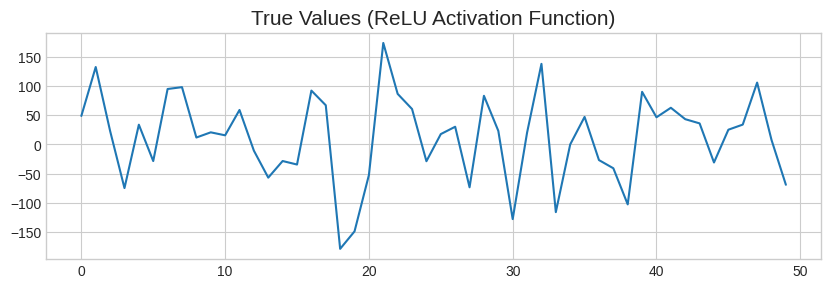

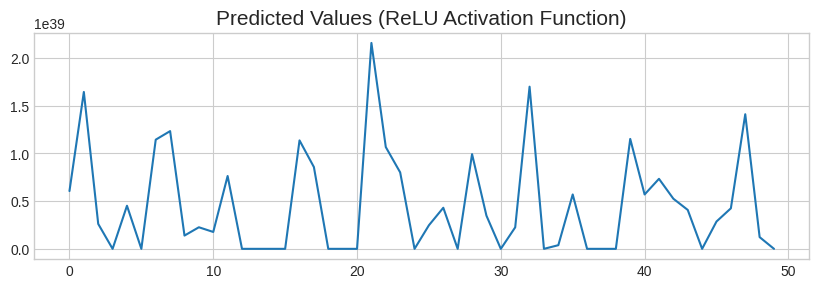

In [143]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10, 3)
plt.style.use('seaborn-whitegrid')
plt.plot(y_test,label='True Values')
plt.title('True Values (ReLU Activation Function)', fontSize=15)
plt.show()

plt.plot(y_pred,label='Predicted values')
plt.title('Predicted Values (ReLU Activation Function)', fontSize=15)
plt.show()

Linear

In [144]:
import time
import numpy
import pandas as pd

class Neural_Network:
  def __init__(self):
    # Define the number of neurons
    #Weights
    self.w1=np.random.randn(3, 2)
    self.w2=np.random.randn(1, 3)
    #Biases
    #self.b_h= np.random.rand(X.T.shape[1])
    #self.b_y_pred= np.random.rand(X.T.shape[1])

  def ReLU(self, X): return X

  def feedforward(self,X):
    #print(X.T.shape)
    self.l1 = (np.dot(self.w1 ,X.T)) 
    #print(self.l1)
    self.l1_output = np.array(self.ReLU(self.l1))  
    #print(self.l1_output)
    self.output = np.dot(self.w2, self.l1_output)
    self.y_pred_1 = self.ReLU(self.output)
    return(self.y_pred_1)

  def backpropagation(self, X, y):
    # Layer Error
    self.po= (self.y_pred_1 - self.y)
    self.dWo = np.dot(self.po, self.l1_output.transpose())

    self.th =  np.dot(self.w2.T , self.po)*self.l1_output*(1-self.l1_output)
    self.dWh = np.dot(self.th , X)

    # Update weights
    self.w1 -= self.lr * self.dWh
    self.w2 -= self.lr * self.dWo

    # Update the biases

  def fit(self, X, y, epoch, lr, alpha):
    self.X=X
    self.y=y
    self.epoch=epoch
    self.lr = lr
    self.alpha=alpha
    self.mse_list = []
    self.acc_list=[]
    for i in range(epoch):
      mse = np.square(np.subtract(y,self.predict(X))).mean()
      self.mse_list.append(mse)

      acc=(np.array(y) == np.array(self.predict(X))).sum() / y.shape[0]
      self.acc_list.append(acc)

      self.feedforward(X)
      self.backpropagation(X,y) 
    return self.mse_list, self.acc_list

  def predict(self, X):
      y_pred_1 = self.feedforward(X)
      return y_pred_1.T

  def plot(self):
    #Plot MSE
    plt.rcParams['figure.dpi'] = 227
    plt.rcParams['figure.figsize'] = (10, 3)
    plt.style.use('seaborn-whitegrid')
    plt.plot(self.mse_list,label='MSE')
    plt.title('Neural Network Training Process', fontSize=15)
    plt.xlabel('Epoch', fontSize=12)
    plt.ylabel('MSE', fontSize=12)
    plt.show()
    # PLot Accuracy
    plt.rcParams['figure.dpi'] = 227
    plt.rcParams['figure.figsize'] = (10, 3)
    plt.style.use('seaborn-whitegrid')
    plt.plot(self.acc_list,label='accuracy')
    plt.title('Neural Network Training Process', fontSize=15)
    plt.xlabel('Epoch', fontSize=12)
    plt.ylabel('Accuracy', fontSize=12)
    plt.show()

In [145]:
model = Neural_Network()
network=model.fit(X_train, y_train, epoch=3, lr=0.005, alpha=0.7)
y_pred = model.predict(X_test)
mse=np.square(np.subtract(y_test, y_pred)).mean()
mse

3.467155072976019e+146

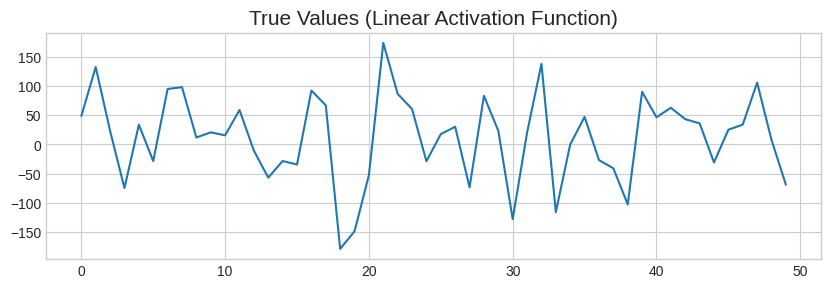

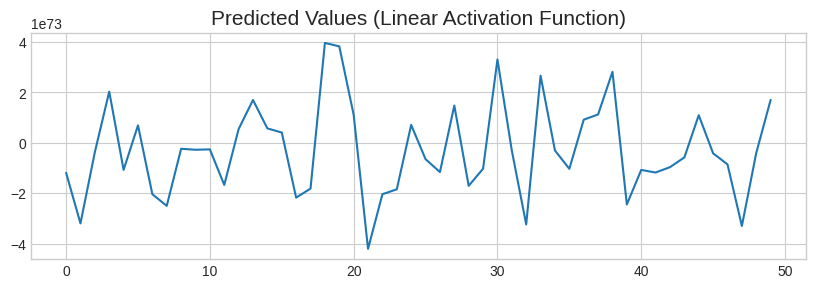

In [146]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10, 3)
plt.style.use('seaborn-whitegrid')
plt.plot(y_test,label='True Values')
plt.title('True Values (Linear Activation Function)', fontSize=15)
plt.show()

plt.plot(y_pred,label='Predicted values')
plt.title('Predicted Values (Linear Activation Function)', fontSize=15)
plt.show()